# FILE TO MOVE TO EXP FOLDER

In [1]:
import numpy as np
from spqr import RiskOptimizer
from spqr.measures import quantile
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

# Plot 1 : Linear relationship

In [46]:
# Create Dataset
n = 100
X,Y = make_regression(n_samples=n, n_features=1, noise=10)

x_mean = np.mean(X)
y_mean = np.mean(Y)

# Create Loss
def L(w,x,y):
    return y - y_mean - np.dot(w,x - x_mean)
def L_prime(w,x,y):
    return -1.0 * (x - x_mean)

In [49]:
# Fit the Model
# Instantiate Risk Optimizer
p = 0.5
optimizer_05 = RiskOptimizer(L, L_prime, p=p)

optimizer_05.fit(X,Y)

w_star_05 = optimizer_05.solution[0]
w_0_star_05 = quantile(0.5, [Y[i] - (w_star_05 * X[i][0]) for i in range(len(Y))])

p = 0.7
optimizer_07 = RiskOptimizer(L, L_prime, p=p)

optimizer_07.fit(X,Y)

w_star_07 = optimizer_07.solution[0]
w_0_star_07 = quantile(0.7, [Y[i] - (w_star_07 * X[i][0]) for i in range(len(Y))])

p = 0.9
optimizer_09 = RiskOptimizer(L, L_prime, p=p)

optimizer_09.fit(X,Y)

w_star_09 = optimizer_09.solution[0]
w_0_star_09 = quantile(0.9, [Y[i] - (w_star_09 * X[i][0]) for i in range(len(Y))])

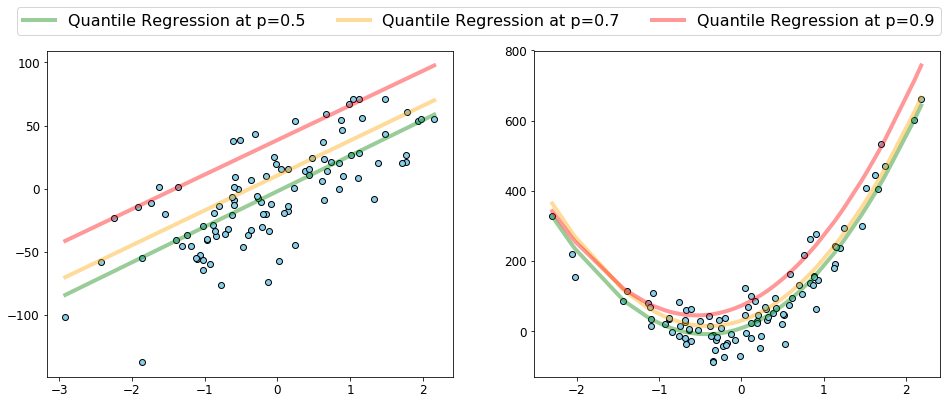

In [119]:
### Create Dataset
n = 100
X,Y = make_regression(n_samples=n, n_features=1, noise=30, random_state=3)

x_mean = np.mean(X)
y_mean = np.mean(Y)

# Create Loss
def L(w,x,y):
    return y - y_mean - np.dot(w,x - x_mean)
def L_prime(w,x,y):
    return -1.0 * (x - x_mean)

# Fit the Model
# Instantiate Risk Optimizer
p = 0.5
optimizer_05 = RiskOptimizer(L, L_prime, p=p)

optimizer_05.fit(X,Y)

w_star_05 = optimizer_05.solution[0]
w_0_star_05 = quantile(0.5, [Y[i] - (w_star_05 * X[i][0]) for i in range(len(Y))])

p = 0.7
optimizer_07 = RiskOptimizer(L, L_prime, p=p)

optimizer_07.fit(X,Y)

w_star_07 = optimizer_07.solution[0]
w_0_star_07 = quantile(0.7, [Y[i] - (w_star_07 * X[i][0]) for i in range(len(Y))])

p = 0.9
optimizer_09 = RiskOptimizer(L, L_prime, p=p)

optimizer_09.fit(X,Y)

w_star_09 = optimizer_09.solution[0]
w_0_star_09 = quantile(0.9, [Y[i] - (w_star_09 * X[i][0]) for i in range(len(Y))])


## Plot Figure

x_min_05 = np.min(X)
y_min_05 = w_0_star_05 + w_star_05 * x_min_05
x_max_05 = np.max(X)
y_max_05 = w_0_star_05 + w_star_05 * x_max_05


x_min_07 = np.min(X)
y_min_07 = w_0_star_07 + w_star_07 * x_min_07
x_max_07 = np.max(X)
y_max_07 = w_0_star_07 + w_star_07 * x_max_07

x_min_09 = np.min(X)
y_min_09 = w_0_star_09 + w_star_09 * x_min_09
x_max_09 = np.max(X)
y_max_09 = w_0_star_09 + w_star_09 * x_max_09

# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
# fig.suptitle('Quantile Regression', fontsize=20)
# ax1.plot(x, y)
# ax2.plot(x, -y)

plt.rcParams.update({'font.size': 12})

l11, = ax1.plot([x_min_05,x_max_05], [y_min_05,y_max_05], 
         marker='', color='green', linewidth=4, alpha=0.4, zorder=2, label='Quantile Regression at p=0.5')

l12, = ax1.plot([x_min_07,x_max_07], [y_min_07,y_max_07], 
         marker='', color='orange', linewidth=4, alpha=0.4, zorder=2, label='Quantile Regression at p=0.7')

l13, = ax1.plot([x_min_09,x_max_09], [y_min_09,y_max_09], 
         marker='', color='red', linewidth=4, alpha=0.4, zorder=2, label='Quantile Regression at p=0.9')



for i in range(len(Y)):
    ax1.plot(X[i][0],Y[i], markerfacecolor='skyblue', marker="o", markeredgecolor="black", markersize=6, zorder=1)

# Add legend
# plt.legend(loc=2)



# Create Dataset
n = 100

X,Y = make_regression(n_samples=n, n_features=1, noise=50, random_state=1)
Y = Y + 100* np.square(X[:,0])

X_to_train = np.array([[u, u**2] for u in X[:,0]])

x_mean = np.mean(X_to_train, axis=0)
y_mean = np.mean(Y)


# Create Loss
def L(w,x,y):
    return y - y_mean - np.dot(w,x - x_mean)
def L_prime(w,x,y):
    return -1.0 * (x - x_mean)

# Fit the Model
# Instantiate Risk Optimizer
p = 0.5
optimizer_05 = RiskOptimizer(L, L_prime, p=p)

optimizer_05.fit(X_to_train, Y)

w_star_05 = optimizer_05.solution[0]
w_star_05_2 = optimizer_05.solution[1]
w_0_star_05 = quantile(0.5, [Y[i] - (w_star_05 * X_to_train[i][0] + w_star_05_2 * X_to_train[i][1]) for i in range(len(Y))])

p = 0.7
optimizer_07 = RiskOptimizer(L, L_prime, p=p)
optimizer_07.fit(X_to_train, Y)
w_star_07 = optimizer_07.solution[0]
w_star_07_2 = optimizer_07.solution[1]
w_0_star_07 = quantile(0.7, [Y[i] - (w_star_07 * X_to_train[i][0] + w_star_07_2 * X_to_train[i][1]) for i in range(len(Y))])

p = 0.9
optimizer_09 = RiskOptimizer(L, L_prime, p=p)

optimizer_09.fit(X_to_train, Y)

w_star_09 = optimizer_09.solution[0]
w_star_09_2 = optimizer_09.solution[1]
w_0_star_09 = quantile(0.9, [Y[i] - (w_star_09 * X_to_train[i][0] +  w_star_09_2 * X_to_train[i][1]) for i in range(len(Y))])


## Plot Figure
sorted_index_X = np.argsort(X[:,0])
quantile_abs_X = X[sorted_index_X,0]

quantile_ord_05 =  [w_0_star_05 + w_star_05 * u + w_star_05_2 * u**2 for u in quantile_abs_X]
quantile_ord_07 =  [w_0_star_07 + w_star_07 * u + w_star_07_2 * u**2 for u in quantile_abs_X]
quantile_ord_09 =  [w_0_star_09 + w_star_09 * u + w_star_09_2 * u**2 for u in quantile_abs_X]

# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.rcParams.update({'font.size': 12})

l21, = ax2.plot(quantile_abs_X, quantile_ord_05, 
         marker='', color='green', linewidth=4, alpha=0.4, zorder=2, label='Quantile Regression at p=0.5')

l22, = ax2.plot(quantile_abs_X, quantile_ord_07, 
         marker='', color='orange', linewidth=4, alpha=0.4, zorder=2, label='Quantile Regression at p=0.7')

l23, = ax2.plot(quantile_abs_X, quantile_ord_09, 
         marker='', color='red', linewidth=4, alpha=0.4, zorder=2, label='Quantile Regression at p=0.9')

for i in range(len(Y)):
    ax2.plot(X[i][0],Y[i], markerfacecolor='skyblue', marker="o", markeredgecolor="black", markersize=6, zorder=1)

lines = [l11, l12, l13, l21, l22, l23]    
labels = ['Quantile Regression at p=0.5', 'Quantile Regression at p=0.7', 'Quantile Regression at p=0.9']

plt.legend(lines, labels, loc = 'upper center', bbox_to_anchor = (0,0,1,1), ncol=3,
            bbox_transform = plt.gcf().transFigure, prop={'size' : 16} )    
# # Add legend
# plt.legend(loc=2)

plt.savefig('quantile_regression.pdf')
plt.show()

In [71]:
print(optimizer_07.solution)

[56.08841901]


# Plot 2: Quadratic Relationship

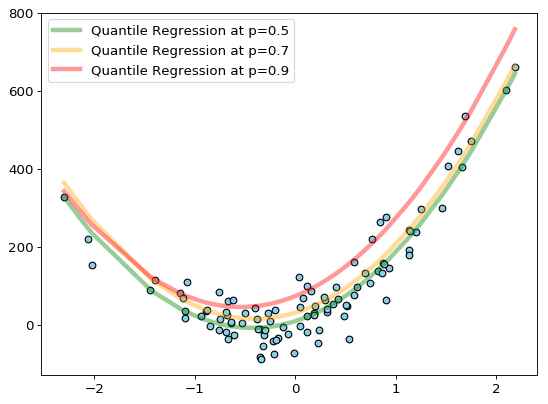

In [93]:
# Create Dataset
n = 100

X,Y = make_regression(n_samples=n, n_features=1, noise=50, random_state=1)
Y = Y + 100* np.square(X[:,0])

X_to_train = np.array([[u, u**2] for u in X[:,0]])

x_mean = np.mean(X_to_train, axis=0)
y_mean = np.mean(Y)


# Create Loss
def L(w,x,y):
    return y - y_mean - np.dot(w,x - x_mean)
def L_prime(w,x,y):
    return -1.0 * (x - x_mean)

# Fit the Model
# Instantiate Risk Optimizer
p = 0.5
optimizer_05 = RiskOptimizer(L, L_prime, p=p)

optimizer_05.fit(X_to_train, Y)

w_star_05 = optimizer_05.solution[0]
w_star_05_2 = optimizer_05.solution[1]
w_0_star_05 = quantile(0.5, [Y[i] - (w_star_05 * X_to_train[i][0] + w_star_05_2 * X_to_train[i][1]) for i in range(len(Y))])

p = 0.7
optimizer_07 = RiskOptimizer(L, L_prime, p=p)
optimizer_07.fit(X_to_train, Y)
w_star_07 = optimizer_07.solution[0]
w_star_07_2 = optimizer_07.solution[1]
w_0_star_07 = quantile(0.7, [Y[i] - (w_star_07 * X_to_train[i][0] + w_star_07_2 * X_to_train[i][1]) for i in range(len(Y))])

p = 0.9
optimizer_09 = RiskOptimizer(L, L_prime, p=p)

optimizer_09.fit(X_to_train, Y)

w_star_09 = optimizer_09.solution[0]
w_star_09_2 = optimizer_09.solution[1]
w_0_star_09 = quantile(0.9, [Y[i] - (w_star_09 * X_to_train[i][0] +  w_star_09_2 * X_to_train[i][1]) for i in range(len(Y))])


## Plot Figure
sorted_index_X = np.argsort(X[:,0])
quantile_abs_X = X[sorted_index_X,0]

quantile_ord_05 =  [w_0_star_05 + w_star_05 * u + w_star_05_2 * u**2 for u in quantile_abs_X]
quantile_ord_07 =  [w_0_star_07 + w_star_07 * u + w_star_07_2 * u**2 for u in quantile_abs_X]
quantile_ord_09 =  [w_0_star_09 + w_star_09 * u + w_star_09_2 * u**2 for u in quantile_abs_X]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 12})

plt.plot(quantile_abs_X, quantile_ord_05, 
         marker='', color='green', linewidth=4, alpha=0.4, zorder=2, label='Quantile Regression at p=0.5')

plt.plot(quantile_abs_X, quantile_ord_07, 
         marker='', color='orange', linewidth=4, alpha=0.4, zorder=2, label='Quantile Regression at p=0.7')

plt.plot(quantile_abs_X, quantile_ord_09, 
         marker='', color='red', linewidth=4, alpha=0.4, zorder=2, label='Quantile Regression at p=0.9')

for i in range(len(Y)):
    plt.plot(X[i][0],Y[i], markerfacecolor='skyblue', marker="o", markeredgecolor="black", markersize=6, zorder=1)

# Add legend
plt.legend(loc=2)

plt.savefig('quantile_regression_quadratic.pdf')
plt.show()

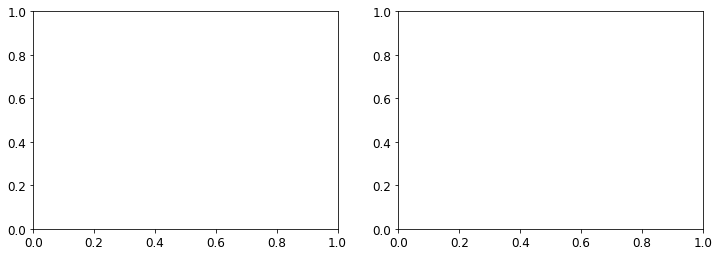

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
